# Projet théorique " Statistique Non Paramétrique "


Données :
* On dispose d’un échantillon ${ X= (X_1,...,X_n)}$ de variables aléatoires indépendantes et de même loi (i.i.d.) positives, de densité commune ${f}$ inconnue et de fonction de répartition ${F}$ tel que, ${F(x)} = {P(X_1≤x)}$ inconnue. 
* On appelle fonction de survie la fonction S définie par ${S(x)} = {P(X_1> x)} = {1−F(x)}$

But :

* estimer sur un intervalle [0,b] pour b > 0 fixé , la fonction de risque instantané définie par :
$$ r(x) = \frac {f(x)}{s(x)}$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as st
import random

In [ ]:
#Fonctions utiles pour les programmes

def Indicatrice(X,x): # La fonction Indicatrice qui calcul 1{X>x}, renvoie un vecteur composé de 1 ou 0, si X est un vecteur.
   
    return (X>x)+0
    
   
        

# Partie 1 : l'estimateur de la survie empirique
### Question1

 Remarquons que $\hat {S_n}$ est la moyenne empirique de $\mathbb{1}_{\{X_1>x\}}$. Pourquoi, est-il  convenable pour estimer $S(x)$?

Pour comprendre cela il faut, déjà, remarquer  que $S(x)=\mathbb{P}(X_1>x)= \mathbb{E}(\mathbb{1}_{\{X_1>x\}})$. On en donnera une explication plus détaillé dans la suite.


Ainsi, on va coder l'estimateur :

$$\hat {S_n}(x)=\frac{1}{n} \sum_{i=1}^n \mathbb{1}_{\{X_i>x\}}$$

In [ ]:
#La fonction S_hat

def S_hat(X,grid):
    r=[]
    for x in grid:
        r.append(np.mean(Indicatrice(X,x))) # Calcul la moyenne de (1{X1>x},..,1{Xn>x}) pour chaque composante, x,  de grid
        
        
    S=np.array(r)
    return S
   

#Test S_hat

X=st.expon.rvs(scale=1,size=100) # On génère un échantillon qui suit la loi exponentielle de paramètre 1
grid=np.linspace(0,2,100)



S_hat(X,grid)
    

array([1.  , 0.97, 0.95, 0.92, 0.91, 0.9 , 0.88, 0.88, 0.88, 0.85, 0.84,
       0.84, 0.84, 0.83, 0.8 , 0.79, 0.79, 0.78, 0.75, 0.74, 0.72, 0.69,
       0.66, 0.65, 0.62, 0.61, 0.61, 0.61, 0.57, 0.55, 0.54, 0.53, 0.53,
       0.52, 0.49, 0.47, 0.46, 0.45, 0.44, 0.43, 0.42, 0.41, 0.41, 0.39,
       0.39, 0.39, 0.36, 0.34, 0.33, 0.33, 0.33, 0.33, 0.31, 0.29, 0.29,
       0.29, 0.29, 0.28, 0.28, 0.28, 0.28, 0.26, 0.26, 0.26, 0.25, 0.24,
       0.23, 0.22, 0.21, 0.2 , 0.18, 0.17, 0.17, 0.17, 0.15, 0.15, 0.14,
       0.14, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.11, 0.11,
       0.09, 0.09, 0.09, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08,
       0.08])

### Question 2
Comme nous l'avons, d'emblée, fait remarquer $S(x)= \mathbb{E}(\mathbb{1}_{\{X_1>x\}})$, et $\hat {S_n}(x)$ est la moyenne empirique de $\mathbb{1}_{\{X_1>x\}}$, on a d'après la loi des grands nombres, $\hat{S_n} \rightarrow \mathbb{E}(\mathbb{1}_{\{X_1>x\}})= \mathbb{P}(X_1>x)= S $ comme le prouve la figure lorsqu'on fait grandir n.

On va tracer sur un même graphique la fonction ${S}$ et son estimée $\hat{S_n}$


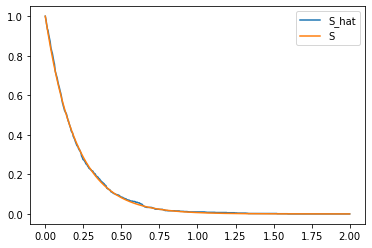

In [ ]:
def S(grid,lam):   # Calcul de la fonction S
    r=[]
    for a in grid:
        if a<0:
            r.append(0)
        else:
            r.append(np.exp(-lam*a))
    r=np.array(r)        
        
    return r


#Représentation
lam=5
n=1000
b=2
X=st.expon.rvs(scale=1/lam,size=n) # On génère un échantillon qui suit la loi exponentielle de paramètre lam
grid=np.linspace(0,b,n)

plt.plot(grid,S_hat(X,grid),label="S_hat")
plt.plot(grid,S(grid,lam),label="S")
plt.legend()
        




# Partie 2 : Etude d'un estimateur de  ${ f }$

Soit $ {(\phi_{j})}_ {1≤{j}≤D} $ la base trigonométrique qui est une base orthornormée de fonctions de ${ L^2([0,1])}$. On note $ {(\tilde\phi_{j})}_ {1≤{j}≤D} $ définie par :
$$ {\tilde\phi_{j}(x)} = \frac {1} {\sqrt {b}}  \phi_{j}(\frac {x} {b})_{1≤{j}≤D} , b > 0  $$ 
qui est une base orthornormée de fonctions de ${L^2([0,b])}$.



### Question 3
${->}$  on va coder ${\tilde\phi_{j}(x)}$ :

In [ ]:
def trigo_fun(D,grid,b): # d = max_degree, x grille où sont évaluées les phi_j
    
    max_degree=math.floor(D/2) #prendre la partie entière de D/2.
    
    shape = [2*max_degree + 1] + list(grid.shape)
    
    phi = np.zeros(shape) # Matrice de taille (D, longueur(grid))
    
    phi[0,:] = 1/math.sqrt(b)
    
    if max_degree > 0:
        for j in range(1, max_degree+1):
            phi[2*j-1,:] = (math.sqrt(2)/math.sqrt(b))* np.cos(2*math.pi*j*(grid/b))
            phi[2*j,:] =(math.sqrt(2)/math.sqrt(b)) * np.sin(2*math.pi*j*(grid/b))
       
    return phi


# Test
D=5
b=2
grid=np.linspace(0,b,1000)

len(trigo_fun(D, grid,b))

5

### Question 4
On cherche a coder l'estimateur par projection de f défini par :
$$ \hat{f}_D = \sum_{j=1}^{D} {\hat\alpha_j}{\tilde\phi_{j}}$$   avec $$ {\hat\alpha_{j}} = {\frac{1}{n}} {\sum_{i=1}^{n}} {\tilde\phi_{j}(X_i)}$$


In [ ]:
def f_hat(D,X, grid,b): # X = data, grid = grille où est évaluée l'estimateur
    
    coeff = np.mean(trigo_fun(D,X,b),axis = 1) # les alpha_j
    f_hat = np.sum(coeff.reshape(-1,1)*trigo_fun(D,grid,b), axis = 0)
   
    return f_hat

### Question 5

 Remarquons, d'emblée, que plus $D$ est grand plus $f_{hat}$ est sensé se rapprocher de la vraie valeur de $f$. En effet, on part du principe que $f\in L^2([0,b])$ et la base $ (\tilde\phi_{j})_ {1≤{j}≤D} $ est une famile libre de $ L^2([0,b])$ or $f_{hat}$ est perçu comme la projection de $f$ sur le sous-espace engendrée par $ {(\tilde\phi_{j})}_ {1≤{j}≤D} $, bien que les coefficients de projections soient estimés. Ainsi, plus $D$ est grand, plus le sous-espace engendrer par $ {(\tilde\phi_{j})}_ {1≤{j}≤D} $ se rapproche de $ L^2([0,b])$, et donc $f_{hat}$ se rapprocher de $f$ mais bizarrement on a des inattendus. Pourquoi? C'est ce qu'on découvrira dans la suite.


 On va tracer sur un même graphique la fonction  ${f}$ et sa valeur estimée $f_{hat}$ , pour $D$ croissant.
 



C:\Users\Ouattara Hamed\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


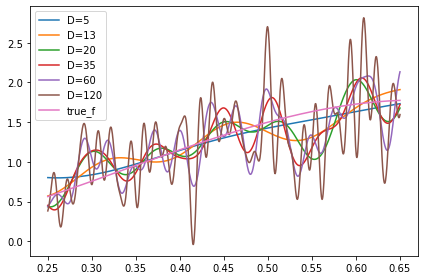

In [ ]:
n = 1000
D =np.array([5,13,20,35,60,120])

b=3/4
grid = np.linspace(0.25,0.65,n) # gid est bien inclure dans [0,b]
X_1 = st.beta.rvs(a=3,b=2, size = n)
true_f =st.beta.pdf(grid,a=3,b=2)

def f_Estimer_repr(D,X_1,grid,b): # Pour calculer f_hat ave plusieurs valeurs de D
    repr=[]
    for a in D:
        repr.append(f_hat(a,X_1, grid,b))
        
    repr.append(true_f)    
    repr=np.array(repr)
    return repr

fig, ax = plt.subplots()

ax.plot(grid,f_Estimer_repr(D,X_1,grid,b).T)

ax.legend([r"D=5", r"D=13", r"D=20",r"D=35",r"D=60",r"D=120",r"true_f"])


fig.tight_layout()
fig.show()

 


### Question 6

Le constat s'impose, plus $D$ est grand, plus la courbe de $f_{hat}$ oscille autour de la vraie valeur de $f$. Pourquoi cela?

Comme nous l'avons dit $f_{hat}$ est la projection de $f$ sur le sous-espace engendré par $ {(\tilde\phi_{j})}_ {1≤{j}≤D} $ et plus $D$ est grand plus ce sous-espace se rapproche de $ L^2([0,b])$, et donc $f_{hat}$ est sensé se rapprocher de $f$. Mais, il y a un détail à prendre en compte, les coefficients de projections $(\alpha_{j})_{1\le j\le n}$ sont remplacés par les coefficients estimés ${\hat\alpha_{j}} = {\frac{1}{n}} {\sum_{i=1}^{n}} {\tilde\phi_{j}(X_i)}$.

Ainsi, on a notre suspect. Pour l'inculper, il faut remarquer $\alpha_{j}=\mathbb{E}(\hat\alpha_{j})$, ce qui est d'ailleurs positif car  cela signifie que notre estimateur est sans biais mais cela traduit aussi le fait que le risque d'erreur lié à $\hat\alpha_{j}$ ne dépend que de $Var(\hat\alpha_{j})$  et donc $\mathbb{E}( \parallel f_D-f_{hat} \parallel)= \sum_{1}^{D}Var(\hat\alpha_{j})$. Ainsi, plus $D$ est grand, plus le risque est grand.


Pour résumer, ces oscillations témoignent du fait que plus $D$ est grand plus on aura de termes de variance à calculer, et donc plus l'erreur moyen sera grand. Pour pallier à ce problème, on peut ajouter un terme de régularisation de $D$

#  Partie 3 : Etude d'un estimateur de ${r}$ 

En supposant que ${∀ x ∈[0,b] ,S(x)>a}$ pour un ${a>0}$ supposé connu, on propose d’estimer ${r}$ avec
$$ \hat{ r}_D(x) = \frac {\hat{f}_D(x)}{\hat{S}_n(x)}{\mathbb{1}_{\{\hat {S}_n(x)>\frac{a}{2}\}}}$$

Dans cette partie on considère n= 1000,${X_1}={Z1}+{U1}$ où ${Z1∼B(1,3)}$ est indépendante de ${U1∼U([0,2])}$ et b= 1.


### Question 7 
* Justifions pourquoi on peut choisir ${a=\frac{1}{2}}$ dans cet exemple : 

$X_{1}=Z_{1}+U_{1}$ 

$S(X)=\mathbb{P}(X_{1}>x)>1/2$

$f_{Z1}=\frac{x^{\alpha -1}(1-x)^{\beta -1}}{B(\alpha,\beta)}\mathbb{1}_{[0,1]}$ et $f_{U1}=\frac{1}{2}\mathbb{1}_{[0,2]}$

Et donc $$f_{X1}=f_{Z1}*f_{U1} => f_{X1}(x)=\int\limits\mathrm{f_{Z1}(t)}\, \mathrm{f_{U1}(x-t)} \mathrm{dt}$$
On en déduit:


$$    
   \begin{array}{r c l}
           & & 0 & x\notin [0,3]  \\
       & & \frac{1}{2}(1-(1-x)^3) & x\in [0,1]  \\
      f_{X1}(x)  &= & \frac{1}{2} & x\in [1,2]\\
       & & \frac{1}{2}(3-x)^3& x\in [2,3]
  \end{array} $$
  
 Et:
  
  
  \begin{array}{r c l}
           & & 0 & x<0\\
       & & \frac{1}{2}(x+\frac{(1-x)^4)}{4})-\frac{1}{8} & x\in [0,1]  \\
      F_{X1}(x)  &= & \frac{1}{2}x-\frac{1}{8} & x\in [1,2]\\
       & & 1-\frac{1}{2}\frac{(3-x)^4}{4}& x\in [2,3]\\
       & & 1 & x>3
  \end{array}
  
  
    


Ici, on veut que $x \in [0,b]$, si b=1, on doit avoir  $ \forall x \in [0,1]$(car b=1), doit avoir $S(x)>a$.

Remarquons que $S(x)=1-F_{X_1}(x)$

Ainsi, si $x\in [0,1], 1-\frac{1}{2}(x+\frac{(1-x)^4)}{4})+\frac{1}{8}>a$

$S$ est décroissante(car $F_{X_1}$ est croissante), et donc sur $[0,1]$, on doit avoir au minimun 

$a<\frac{5}{8}$, notamment  $a=\frac{1}{2}$ est une valeur qui marche.

In [ ]:
def fx1(x): # fonction de la vrai densité de X1
    n=len(x)
    y=np.zeros(n)
    for i in range(n):
        if x[i]<0 or x[i]>3:
            y[i]=0
        elif 0<=x[i] and x[i]<=1:
            y[i]=(1/2)*(1-(1-x[i])**3)
        elif 1<=x[i] and x[i]<=2:
            y[i]=1/2
        else:
            y[i]=(1/2)*(3-x[i])**3
    return y

def Fx1(x): # Fonction de la vrai fonction de répartition de X1
    n=len(x)
    y=np.zeros(n)
    for i in range(n):
        if x[i]<0:
            y[i]=0
        elif 0<=x[i] and x[i]<=1:
            y[i]=(1/2)*(x[i]+((1-x[i])**4)/4)-1/8
        elif 1<=x[i] and x[i]<=2:
            y[i]=(1/2)*x[i]-1/8
        elif 2<=x[i] and x[i]<=3:
            y[i]=1-(((3-x[i])**4)/8)
        else:
            y[i]=1
    return y




### Question 8
Pour différentes valeurs de D, on va tracer sur un même graphique différents estimateurs ${\hat r_D}$ construit à partir d’un n-échantillon ${X}$ de variables aléatoires i.i.d. de même loi que ${X_1}$

C:\Users\Ouattara Hamed\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


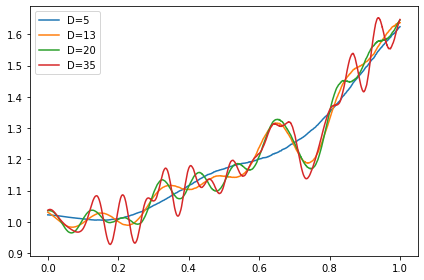

In [ ]:
D=np.array([5,13,20,35])
b=1
n = 10000
U1=np.random.uniform(low=0,high=2,size=n) # On génère un échantillon suiant une loi uniforme sur [0,2]
Z1= st.beta.rvs(a=1,b=3, size = n)#On génère un échantillon suivant la loi Beta.
grid = np.linspace(0,1,n)
X1=U1+Z1           # On génère un échantillon suivant une somme indépendante de loi uniforme et de loi Beta



def r_d(D,X1, grid,b): # Fonction r_d adaptée pour la réprésentation
    r_repr=[]
    for a in D:
         r_repr.append((f_hat(a,X1, grid,b)/S_hat(X1,grid))*Indicatrice(S_hat(X1,grid),1/4))
         
    r_repr=np.array(r_repr) 
    return r_repr
  
   



fig, ax = plt.subplots()

ax.plot(grid,r_d(D,X1, grid,b).T )
ax.legend([r"D=5", r"D=13", r"D=20",r"D=35"])



fig.tight_layout()
fig.show()











### Question bonus


$$\mathbb{E}( \parallel f-f_{hat} \parallel^2)\le  \parallel f-f_{hat} \parallel^2+\frac{\phi_0D}{n}$$

In [ ]:
def D_optimale(eps):
    D=3
    grid = np.linspace(0,1,100)
    X1=U1+Z1 
    b=1
    s=np.linalg.norm((fx1(grid)-f_hat(D,X1, grid,b))**2)
    while s>eps:
        D=D+1
        s=np.linalg.norm((fx1(grid)-f_hat(D,X1, grid,b))**2)
        
    return D    

In [ ]:
 D_optimale(5)